In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**加载图像**

In [200]:
img = plt.imread('./image/test.jpg')
img.shape

(4032, 3024, 3)

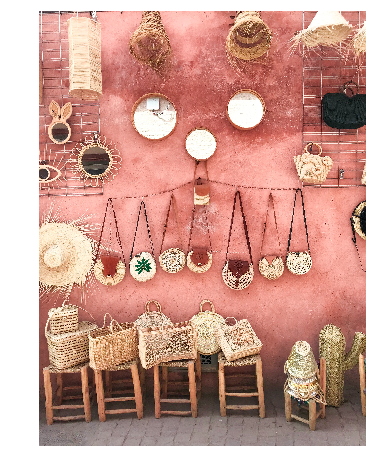

In [201]:
def pltimg(img, h=8, **kwargs):
    '''
    绘制图片
    '''
    
    y = img.shape[0]
    x = img.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w, h))
    plt.imshow(img, interpolation='none', **kwargs)
    plt.axis('off')
    
pltimg(img)

**分离通道**

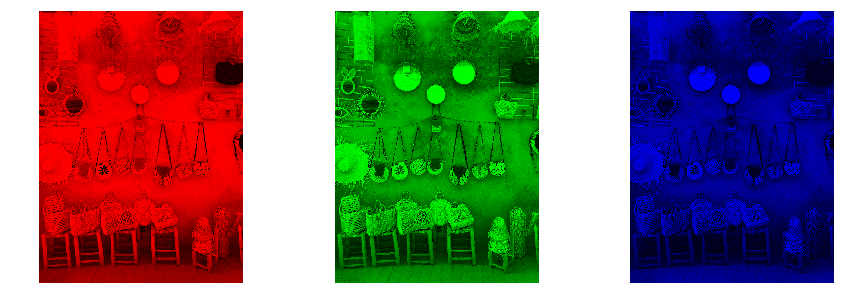

In [202]:
# 将图分成 1 * 3 个子图 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for c, ax in zip(range(3), axs):
    tmp_img = np.zeros(img.shape, dtype='u8')
    tmp_img[:, :, c] = img[:, :, c]
    ax.imshow(tmp_img)
    ax.set_axis_off()

**颜色变换**

In [203]:
def do_normalise(img):
    return -np.log(1/((1 + img)/257) - 1)

In [204]:
def undo_normalise(img):
    return (1 + 1/(np.exp(-img) + 1) * 257).astype("uint8")

In [205]:
def rotation_matrix(theta):
    """
    3D 旋转矩阵，围绕X轴旋转theta角
    """
    return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

In [206]:
img_normed = do_normalise(img)
img_rotated = np.einsum("ijk,lk->ijl", img_normed, rotation_matrix(np.pi))
img2 = undo_normalise(img_rotated)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


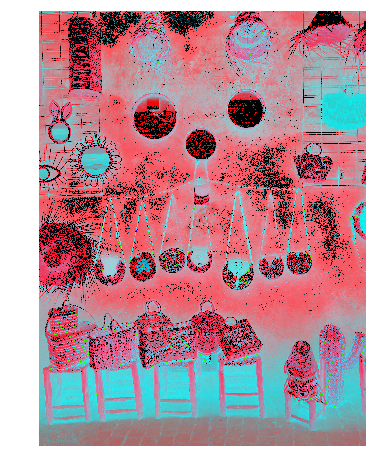

In [207]:
pltimg(img2)

**爱因斯坦求和约定**

In [116]:
A = np.arange(6).reshape(2, 3)
A

array([[0, 1, 2],
       [3, 4, 5]])

In [132]:
B = np.arange(15).reshape(3, 5)
B

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [151]:
C = np.arange(6, 12).reshape(2, 3)
C

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [118]:
b = np.arange(3)
b

array([0, 1, 2])

矩阵转置  
B<sub>ji</sub> = A<sub>ij</sub>

In [125]:
np.einsum('ij->ji', A)

array([[0, 3],
       [1, 4],
       [2, 5]])

求和 

In [126]:
np.einsum('ij->', A)

15

列求和

In [127]:
np.einsum('ij->j', A)

array([3, 5, 7])

行求和

In [128]:
np.einsum('ij->i', A)

array([ 3, 12])

矩阵-向量相乘

In [129]:
np.einsum('ik, k->i', A, b)

array([ 5, 14])

矩阵-矩阵乘积

In [133]:
np.einsum('ik, kj->ij', A, B)

array([[ 25,  28,  31,  34,  37],
       [ 70,  82,  94, 106, 118]])

点积

In [149]:
np.einsum('i,ij->', b, B)

155

哈达玛积

In [154]:
np.einsum('ij, ij->ij', A, C)

array([[ 0,  7, 16],
       [27, 40, 55]])

外积

In [160]:
np.einsum('i,ij->ij', b, B)

array([[ 0,  0,  0,  0,  0],
       [ 5,  6,  7,  8,  9],
       [20, 22, 24, 26, 28]])

batch矩阵相乘

In [164]:
E = np.arange(30).reshape(3, 2, 5)
F = np.arange(45).reshape(3, 5, 3)
E, F

(array([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],
 
        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],
 
        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]), array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]],
 
        [[15, 16, 17],
         [18, 19, 20],
         [21, 22, 23],
         [24, 25, 26],
         [27, 28, 29]],
 
        [[30, 31, 32],
         [33, 34, 35],
         [36, 37, 38],
         [39, 40, 41],
         [42, 43, 44]]]))

In [165]:
np.einsum('ijk, ikl->ijl', E, F)

array([[[  90,  100,  110],
        [ 240,  275,  310]],

       [[1290, 1350, 1410],
        [1815, 1900, 1985]],

       [[3990, 4100, 4210],
        [4890, 5025, 5160]]])

张量缩约

In [168]:
G = np.random.randn(2, 3, 5, 7)
H = np.random.randn(11, 13, 3, 17, 5)

In [169]:
np.einsum('pqrs, tuqvr->pstuv', G, H)

array([[[[[-6.69490879e+00,  2.05726423e+00, -1.13546971e+00, ...,
           -4.06190705e+00,  2.98015434e+00,  1.93754586e+00],
          [ 3.34211140e+00, -5.63758254e-01, -3.49261945e+00, ...,
           -7.44240925e+00, -8.71225352e-03,  4.74404744e+00],
          [ 7.61895990e-01,  2.48174299e+00, -3.45174234e+00, ...,
            3.34889298e+00, -1.44868363e+00,  1.13825210e+00],
          ...,
          [-4.66961028e+00,  3.24166865e+00, -5.03300663e-01, ...,
           -6.01023899e+00,  7.46281103e+00,  2.78414910e+00],
          [-2.43402206e+00, -9.87840968e+00, -2.82562013e+00, ...,
           -1.93622570e+00, -2.43292750e+00,  8.24794673e+00],
          [ 1.84008541e-01,  2.86248892e+00,  3.41589340e-01, ...,
            7.37799935e+00, -2.30647180e+00, -4.14644627e-02]],

         [[-1.37417300e+00,  4.44559918e+00,  3.54101017e+00, ...,
           -1.35979216e+00,  1.14799689e+00, -4.69649529e+00],
          [-4.94368999e+00,  7.55597353e-01, -3.05844156e+00, ...,
      

**动态效果**

In [173]:
from matplotlib.animation import FuncAnimation

In [190]:
fig, ax = plt.subplots(figsize=(5, 8))

def update(i, img=img):
    img_normed = do_normalise(img)
    img_rotated = np.einsum("ijk,lk->ijl", img_normed, rotation_matrix(i * np.pi/10))
    img2 = undo_normalise(img_rotated)
    
    ax.imshow(img2)
    ax.set_title("Angle: {}*pi/10".format(i), fontsize=20)
    ax.set_axis_off()


anim = FuncAnimation(fig, update, frames=np.arange(0, 20), interval=50)
anim.save('colour_rotation.gif', dpi=80, writer='imagemagick')
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


**灰阶**

In [208]:
def to_grayscale(img, weights = np.c_[0.2989, 0.5870, 0.1140]):
    '''
    取原始图像的RGB的加权平均值来将图片转换为灰阶，权重矩阵为tile
    '''
    tile = np.tile(weights, reps=(img.shape[0], img.shape[1], 1))
    
    return np.sum(tile * img, axis=2)  # axis意味着沿着第三维求和

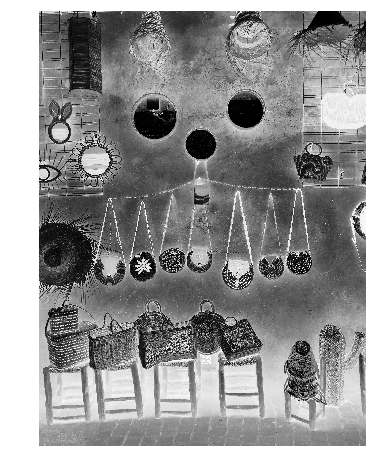

In [209]:
img = to_grayscale(img)
pltimg(img, cmap='Greys')